In [1]:
import pandas as pd
import numpy as np
import csv

def csv_to_data_frame(file_name):
    titles = []
    datas = []

    with open(file_name, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                titles = row
                line_count += 1
            datas.append([int(value) if value.isnumeric() else value for (key, value) in row.items()])
            line_count += 1
        names = pd.DataFrame(datas, columns=titles)

        return names

In [2]:
data = csv_to_data_frame("NationalNames.csv")

In [3]:
# task_3 Отримайте імена стовпців набору даних
data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [4]:
#task_4 Отримайте загальну інформацію про дані у наборі даних
data[["Id", "Year", "Count"]].describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [5]:
#task_5 Знайдіть кількість унікальних імен у наборі даних
data["Name"].nunique()

93889

In [6]:
#task_8 Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
max_item = data.loc[data['Count'].idxmax()]
f"The name is '{max_item['Name']}' in {max_item['Year']}"

"The name is 'Linda' in 1947"

In [7]:
#task_9 Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
len(data.loc[data["Count"] == data["Count"].min()])

254615

In [8]:
#task_11 Знайдіть рік із найбільшою кількістю унікальних імен
unique = data.groupby("Year")["Name"].nunique()
popular_year = unique.idxmax()
unique.loc[popular_year:popular_year]

Year
2008    32488
Name: Name, dtype: int64

In [9]:
#task_12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
popular_group = data.groupby("Year").get_group(popular_year)
popular_group.loc[popular_group['Count'].idxmax()].loc["Name"]

'Jacob'

In [10]:
#task_13 Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
group_name = data.groupby("Name")
jacob_group = group_name.get_group("Jacob")
jacob_f = jacob_group.loc[jacob_group["Gender"] == "F"]
f_index = jacob_f["Count"].idxmax()
jacob_f.loc[f_index:f_index]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [11]:
#task_14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)
group = pd.DataFrame(data.groupby(["Year", "Gender"])["Name"].unique())
year_set = list(set([item[0] for item in group.index]))

m_array = group.loc[(year_set[0], "M")].values[0]
f_array = group.loc[(year_set[0], "F")].values[0]
max_count = len(np.intersect1d(m_array, f_array))
max_year = year_set[0]
for i in range(1, len(year_set)):
    year = year_set[i]
    m_array = group.loc[(year, "M")].values[0]
    f_array = group.loc[(year, "F")].values[0]
    count = len(np.intersect1d(m_array, f_array))
    if count > max_count:
        max_count = count
        max_year = year

pd.DataFrame([[max_year, max_count]], columns=["Year", "Gender_neutral_names"])


,Year,Gender_neutral_names
0,2008,2557


In [12]:
#task_16 Знайдіть рік, коли народилося найбільше дітей
group = data.groupby(["Year"])["Count"].sum()
group.idxmax()

1957

In [13]:
#task_17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

group_f = data.loc[data["Gender"] == "F"].groupby(["Year", "Gender"])["Count"].sum()
group_m = data.loc[data["Gender"] == "M"].groupby(["Year", "Gender"])["Count"].sum()

group_f_m = pd.merge(group_f, group_m, on=["Year"])
group_f_m.rename(columns={"Count_x": "F", "Count_y": "M"}, inplace=True)
group_f_m

,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [14]:
#task_18 Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

group_f_m.loc[group_f_m["F"] > group_f_m["M"]]["F"].count()

54

<AxesSubplot:xlabel='Year'>

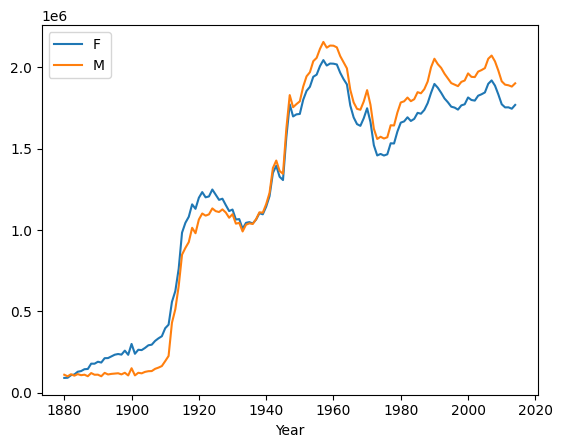

In [15]:
#task_19 Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

group_f_m.plot()

In [29]:
#task_20 Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

group_f = data.loc[data["Gender"] == "F"]["Name"].unique()
group_m = data.loc[data["Gender"] == "M"]["Name"].unique()

len(np.intersect1d(group_f, group_m))

10221

In [33]:
#task_22 Підрахуйте скільки років проводилось спостереження
min_year = data["Year"].min()
max_year = data["Year"].max()
period = max_year - min_year + 1
f'Спостереження проводилося {period} років'

'Спостереження проводилося 135 років'

In [41]:
#task_23 Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

def get_unique_names(group_):
    res = np.array([])
    for j in range(0, len(group_)):
        if len(res) == 0:
            res = group_.iloc[j]
        else:
            res = np.intersect1d(res, group_.iloc[j])

    return res


group_f = data.loc[data["Gender"] == "F"].groupby(["Year"])["Name"].unique()
group_m = data.loc[data["Gender"] == "M"].groupby(["Year"])["Name"].unique()
unique_f = get_unique_names(group_f)
unique_m = get_unique_names(group_m)
np.intersect1d(unique_f, unique_m)

array(['Francis', 'James', 'Jean', 'Jesse', 'Jessie', 'John', 'Johnnie',
       'Joseph', 'Lee', 'Leslie', 'Marion', 'Ollie', 'Robert', 'Sidney',
       'Tommie', 'William'], dtype=object)

In [43]:
#task_24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )
data["Count"].min()

5